# **Predicting the Next Hit on Spotify Top 200 Chart**

Authors: Evelyn Wei, Xueting Pu, Judy Zhu
<br>
Date: May 9, 2022

In [ ]:
import numpy as np
import pandas as pd
import json
import re
import time
import string
import matplotlib.pyplot as plt

+ [Project Introduction](#section_1)
  + [Problem Identification](#section_2)
  + [Related Work](#section_3)
  + [Initital Hypothesis](#section_4)
  + [Project Workflow](#section_5) 
+ [Data Collection](#section_6)
+ [Data Preprocessing and EDA](#section_7)
+ [Model Building](#section_8)
+ [Conclusion](#section_9)
+ [Future Direction](#section_10)

<a name='section_1'></a>
# Project Introduction

<a name='section_2'></a>
### Problem Identification

Online streaming platforms are the most common forms of music consumption. One of the largest music streaming service providers, Spotify, has over 422 million monthly active users. Spotify global chart provides the most streamed songs in the world and is updated weekly. Whether a song gets on the Spotify Top 200 Chart has very important business and musical implications. **Therefore, this study aims to answer the research question: how well can we predict the next top 200 songs on the Spotify Chart, and how do audio features, lyrics, release date, and music genres affect the predictive model?** 

<a name='section_3'></a>
### Related Work on Music Popularity Prediction

Although there are plenty research papers on music popularity prediction, the number of approaches used is limited. The first approach is using comments or discussions from social media networks as inputs to the predictive model. One example is the work of Dhar and Chang (2009) [1]. The study collected data on 108 albums from social media, and concluded that popularity was affected by the number of posts related to the song regardless of whether they are postive or negative. Another approach is to study ranking or charts data. Reiman and Ornell's (2018) research collected 287 songs from 2016 to 2018 that got on the Billboard Top 100 [2]. The model finally achieved an accuracy of 60.2%. The third approach, which is the one similar to this report, is using songs' acoustic features. Interiano's (2018) study collected 500,000 songs from the Official Charts Company and studied general features like danceability. Finally the study achieved an accuracy of 85% [3]. 

Our group decided to use an approach similar to the third method due to its relatively high accuracy and data availability. Apart from acoustic features, our group also considered other features to improve the model, which will be specified in the next section. 

<a name='section_4'></a>
### Initial Hypothesis
Past research identified that acoustic features extracted from the songs themselves may reflect the popularity of songs. Our group considered song lyrics as an important factor as well, since certain songs sentiments may be more welcomed than others. Songs released during the weekends may attract more attention, because people have more free time during weekends. To conclude, given the scope of this project, it is assumed that the following features are related to whether a song gets on the Spotify Top 200 Chart.


*   acoustic features (danceability, loudness, etc.)
*   lyrics sentiment 
*   whether the song was released during the weekend
*   music genre
*   number of unique words in the song

Though literature on music popularity prediction is rich, a model that considers both acoustic features and lyrics sentiment has not been proposed to this date. Thus, this report brought new insights to models predicting music popularity by considering new features, and individually assessing their effect on the performance of the predictive model.

<a name='section_5'></a>
### Project Workflow

Our project generally involved the following sections: 1) Data Collection, 2) Exploratory Data Analysis, 3) Modeling and Comparison. 

Data to be collected included acoustic features, lyrics, genre and release date. Before that, list of hit songs and non-hit songs needed to be extracted. We defined hit songs as songs that got on the Spotify Global Top 200 Chart from 2017-2022 (April), and non-hit songs as songs from the 10% least popular albums from 2017-2022 (April) from the Spotify API. Then, acoustic features, release date, and music genre were retrieved from the Spotify API. Lyrics were retrieved from the Lyricsgenius API. 

Next, exploratory data analysis was conducted to check the difference for hit and non-hit data. Features that showed some difference should be included in the final modeling.

Finally, we came up with five models that included different features as illustrated below:


*   Model 1 (baseline) acoustic features only
*   Model 2 acoustic features + lyrics sentiment
*   Model 3 acoustic features + release date (whether the song was released during weekends)
*   Model 4 acoustic features + genre
*   Model 5 acoustic features + number of unique words

After exploring five classification algorithms (Xgboost, Logistic regression, Random forest, KNN, and Decision tree) and determining the one with the best performance, we would use the algorithm on the above five models and compare their performances. 

<a name='section_6'></a>
# Data Collection

In order to better investigate hit trend in recent years, we used weekly Spotify Top 200 Chart from 2017 to 2022 as hit songs and 2017-2022 albums with the lowest 10% popularity as nonhit sings.

We encountered some complication when trying to collect Spotify's weekly top 200 data. Due to the new implementation of Cloudflare, we were unable to automate scrapping process using third-party APIs (https://github.com/kelvingakuo/fycharts/issues/6) or developing code ourselves. While we tried to find a workaround, the best we could get is the Spotify top song chart for the current week. For the sake of time for this project, we used 2017-2021 Top 200 Chart data from Kaggle and wrote code to automatically retrieve Spotify ID to look up in Spotify API. 



As for 2021-Current hit songs, we manually downloaded data from Spotify and combined it with 2017-2021 Kaggle data to cover full range. The code below imports this dataset. Again, this is NOT our final dataset and we will build extensive insights based on this original information.

In [ ]:
!git clone https://github.com/XuetingPu/15688-project.git

Cloning into '15688-project'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 67 (delta 1), reused 0 (delta 0), pack-reused 61
Unpacking objects: 100% (67/67), done.


The first step is to collect hypothesized feature factors for songs in the dataset. To get acoustic features, song release date and music genre, we utilized Spotify Search API.

*Note*: We did not run the following cells involving data collection since it takes long time. Instead, we prepared the dataset returned after all these steps at the end of Data Collection section.

In [ ]:
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 138 kB 10.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
client_id = "d0fffc34f28a470ba47a460df847e54c"
client_secret = "0e9b10d7f1794265acf89048cc2817f6"
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

First, we extracted Spotify track ID for hit songs from the URL column in Spotify dataset. Each track ID is mapped to the year when it first appeared on Spotify Top 200 Chart. The year information would enable us to do some trend analysis later on.

In [ ]:
def id(x):
    tag = re.compile(r"(?<=https://open.spotify.com/track/)(\w+)")
    return tag.findall(x)[0]

In [ ]:
def get_HitId(file):
    data = pd.read_csv(file)
    # data = data.loc[data["Rank"]<=50]
    link_week = data[["Link", "Week"]]
    link_to_year_hit = {}

    for index,info in link_week.iterrows():
        trackid = id(info['Link'])
        if trackid in link_to_year_hit.keys():
            pass
        else:
            link_to_year_hit[trackid] = info['Week'][:4]
    
    return link_to_year_hit

In [ ]:
hitDict = get_HitId("/content/15688-project/hit_data (1).csv")

In [ ]:
hit_ids = list(hitDict.keys())

In [ ]:
# Check number of hit songs
len(hit_ids)

For nonhit songs, we queried Spotify Search API to return the least popular albums published between 2017 and 2022 and obtained unpopular songs in each album. Each track ID is mapped to the year when the album came out.

In [ ]:
def id2(x):
    tag = re.compile(r"(?<=spotify:track:)(\w+)")
    return tag.findall(x)[0]

In [ ]:
offset_error = []

def get_NonHitId():
    offset = 0
    link_to_year_nonhit = {}
    
    while offset <= 950:
        non_hit_album = sp.search(q="tag:hipster",type="album",offset = offset,limit = 50)
        for i in range(50):
            try:
                year = int(non_hit_album["albums"]["items"][i]["release_date"][0:4])
            except:
                offset_error.append(offset)
                continue
            if year >= 2017 and year <= 2022:
                album_id = non_hit_album["albums"]["items"][i]["id"]
                if non_hit_album["albums"]["items"][i]["total_tracks"]<= 50:
                    num = non_hit_album["albums"]["items"][i]["total_tracks"]
                else:
                    num = 50
                for j in range(num):
                    trackid = sp.album_tracks(album_id,limit = 50)["items"][j]["id"]
                    if trackid not in link_to_year_nonhit.keys():
                        link_to_year_nonhit[trackid] = year
        offset+=50
    return link_to_year_nonhit

In [ ]:
nonhitDict = get_NonHitId()

In [ ]:
# In case of error, query API one more time
for offset in set(offset_error):
    non_hit_album = sp.search(q="tag:hipster",type="album",offset = offset,limit = 50)
    for i in range(50):
        try:
            year = int(non_hit_album["albums"]["items"][i]["release_date"][0:4])
        except:
            offset_error.append(offset)
            continue
        if year >= 2017 and year <= 2022:
            album_id = non_hit_album["albums"]["items"][i]["id"]
            if non_hit_album["albums"]["items"][i]["total_tracks"]<= 50:
                num = non_hit_album["albums"]["items"][i]["total_tracks"]
            else:
                num = 50
            for j in range(num):
                trackid = sp.album_tracks(album_id,limit = 50)["items"][j]["id"]
                if trackid not in nonhitDict.keys():
                    nonhitDict[trackid] = year

In [ ]:
len(nonhitDict)

In [ ]:
nonhit_ids = nonhitDict.keys()

To account for situation where a song might be popular while an album containing that song might be not (i.e. a remix album), we filtered track ID for all unpopular songs based on the condition that if the track ID is not in the hit ID list we defined before, it will be in our nonhit ID list.

In [ ]:
least_hit_ids = []
for i in nonhit_ids:
    if i not in hit_ids:
        least_hit_ids.append(i)

In [ ]:
# Check number of nonhit songs
len(least_hit_ids)

After getting all track ID we needed, we called API to return **acoustic features** of each song.

In [ ]:
def getAudioFeatures(trackID, year):
    metadata = sp.track(trackID)
    audio_features = sp.audio_features(trackID)
    if audio_features != [None]:
      # Metadata for tracks and artists
      name = metadata['name']
      album = metadata['album']['name']
      artist = metadata['album']['artists'][0]['name']
      artist_id = metadata['album']['artists'][0]['id']
      artist_popularity = sp.artist(artist_id)["popularity"]
      release_date = metadata['album']['release_date']
      length = metadata['duration_ms']
      popularity = metadata['popularity']
    
      # Audio Features provided by Spotify API
      acousticness = audio_features[0]['acousticness']
      danceability = audio_features[0]['danceability']
      energy = audio_features[0]['energy']
      instrumentalness = audio_features[0]['instrumentalness']
      liveness = audio_features[0]['liveness']
      loudness = audio_features[0]['loudness']
      speechiness = audio_features[0]['speechiness']
      tempo = audio_features[0]['tempo']
      time_signature = audio_features[0]['time_signature']
      trackID = audio_features[0]['id']

      track = [name, trackID, popularity, album, artist,artist_popularity, release_date, 
          length, acousticness, danceability, energy, instrumentalness, liveness,
          loudness, speechiness, tempo, time_signature, year]
    else:
      track = 'None'
    return track

In [ ]:
hit = []
skipped = []

for i in range(len(hit_ids)):
    try:
        trackid = hit_ids[i]
        track = getAudioFeatures(trackid, hitDict[trackid]) 
        if track != 'None':
            hit.append(track)
    except:
        skipped.append(i)
        continue

In [ ]:
skipped

In [ ]:
len(hit)

In [ ]:
# Create dataframe for hit songs
hit_charts = pd.DataFrame(
    hit,
    columns=[ 'name', 'trackID', 'popularity', 'album', 'artist', "artist_popularity", 'release_date', 'length', 'acousticness', 'danceability', 'energy',
        'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'year'])

hit_charts['Is hit'] = 1 # Binary Variable identifies if a track is hit or non-hit
hit_charts.head()

In [ ]:
non_hit = []
skipped_nonhit = []

for i in range(len(least_hit_ids)):
    try:
        trackid = least_hit_ids[i]
        track = getAudioFeatures(trackid, nonhitDict[trackid])
        if track != 'None':
            non_hit.append(track)
    except:
        # print("Skipping: " + str(i))
        skipped_nonhit.append(i)
        continue

In [ ]:
skipped_nonhit

In [ ]:
len(non_hit)

In [ ]:
# Create dataframe for non hit songs
non_hit_charts = pd.DataFrame(
    non_hit,
    columns=[ 'name', 'trackID', 'popularity', 'album', 'artist', "artist_popularity", 'release_date', 'length', 'acousticness', 'danceability', 'energy',
        'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'year'])

non_hit_charts['Is hit'] = 0 # Binary Variable identifies if a track is hit or non-hit
non_hit_charts.head()

In [ ]:
frames = [hit_charts,non_hit_charts]
X = pd.concat(frames,ignore_index=True)

Next feature we would like to analyze is **genre**. According to *Statista* report, the top five leading music genres rated by consumbers in the United States as of May 2018 are **pop, rock, country, r&b, and hiphop** [4]. We assumed if a song's genre is one of them, it will be easier to get popular. Therefore, we added five columns which represent these five genres using *One-Hot Encoding*. If a song belongs to the genre, we marked it 1. Otherwise, we gave it 0.

In [ ]:
all_ids = X["trackID"]
Pop = []
Rock = []
Country = []
R_B = []
Hiphop = []
for i in all_ids:
  artist_id = sp.track(i)["album"]["artists"][0]["id"]
  genres = sp.artist(artist_id)["genres"]
  if "pop" in genres:
    Pop.append(1) # Binary Variable identifies if a track is pop or not
  else:
    Pop.append(0)
  if "hip hop" in genres:
    Hiphop.append(1) # Binary Variable identifies if a track is hiphop or not
  else:
    Hiphop.append(0)
  if "rock" in genres:
    Rock.append(1) # Binary Variable identifies if a track is rock or not
  else:
    Rock.append(0)
  if "r&b" in genres:
    R_B.append(1) # Binary Variable identifies if a track is r&b or not
  else:
    R_B.append(0)
  if "country" in genres:
    Country.append(1) # Binary Variable identifies if a track is country or not
  else:
    Country.append(0)

In [ ]:
# Add these columns to X
X["Pop"] = Pop
X["Rock"] = Rock
X["Country"] = Country
X["R&B"] = R_B
X["Hiphop"] = Hiphop

Also, we want to explore the feature of **whether a song was released on weekend**. We assumed that a song would become more popular if it was released on weekend. When we got audio features, we already had track release date. What we should do now is to check the weekday of release date. Since the release date we had is string, we transformed it to date. If the number of weekday is 0 (Sunday) or 6 (Saturday), we used *One-Hot Encoding* and marked it 1.

In [ ]:
from datetime import datetime
weekend = []
for i in X['release_date']:
  # date_str='2016-12-09'
  if len(i)== 10:
    datetime_object = datetime.strptime(i, '%Y-%m-%d')
    num = datetime_object.weekday()
    if num == 0 or num == 6:
      weekend.append(1) # Binary Variable identifies if a track is released on weekend or not
    else:
      weekend.append(0)
  else:
    weekend.append(0)

In [ ]:
# Add Is weekend feature to X
X["Is weekend"] = weekend

In [ ]:
songs = X[['name','artist']]

Next, we obtained **song lyrics** through LyricsGenius, a Python library that pulls lyrics data stored on *Genius.com* using the website's API.

In [ ]:
!pip install lyricsgenius
import lyricsgenius

     |████████████████████████████████| 59 kB 2.7 MB/s 


In [ ]:
token = 'TTFdH0XPAYEabzQ5sQ31-xb2DyFZ75PFAFQvAapQvz4Q4UqKSVnhJ2ZifgjrdU-s'
genius = lyricsgenius.Genius(token, timeout=20)

Some songs' names contain guest singer names such as "Rockabye (feat. Sean Paul & Anne-Marie)". Therefore, We defined a function to remove parenthesis, dashes, and square brackets in songs' names for search precision. Then we used song and artist information to retrieve lyrics.

In [ ]:
def cleanData(text):
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
    sep = '-'
    stripped = text.split(sep, 1)[0].strip()
    return stripped

In [ ]:
# Clean names of songs
songs = songs.copy()
songs['name'] = songs['name'].apply(lambda x: cleanData(x))

In [ ]:
lyrics = {}
missing = []

for i in songs.index:
    try:
        name = songs.iloc[i]['name']
        artist = songs.iloc[i]['artist']
        if artist != "Various Artists":
            song = genius.search_song(name, artist)
        else:
            song = genius.search_song(name)
        lyrics[i] = song.lyrics
    except:
        # print("Exception: " + name, artist)
        missing.append(i)
        pass

In [ ]:
missing

In [ ]:
# Search for songs that encountered an error
for i in missing:
    try:
        name = songs.iloc[i]['name']
        artist = songs.iloc[i]['artist']
        song = genius.search_song(name)
        lyrics[i] = song.lyrics
    except:
        lyrics[i] = None
        pass

In [ ]:
X['lyrics'] = lyrics.values()

As acoustic feature and lyrics scrapping takes long time to run, we already saved a copy of the result dataset. Here we uploaded it to Colab.

In [ ]:
import sys
import zipfile
import os
zip_ref = zipfile.ZipFile('/content/15688-project/final_data_without_sentiment.csv.zip', 'r') # Opens the zip file in read mode
zip_ref.extractall("/content") # Extracts the files into the /content folder
zip_ref.close()

In [ ]:
data_df = pd.read_csv("/content/final_data_without_sentiment.csv", encoding='utf8')
# Remove unnamed index columns in Dataframe
data_df = data_df.loc[:, ~data_df.columns.str.contains('^Unnamed')]

<a name='section_7'></a>
# Data Preprocessing and EDA

Exploratory data analysis is the first step after we collected all the data. Our EDA is conducted in two parts, audio features and lyrics. For audio features section, we plotted the following two types of figures:


*   Mean value of features over time (bar charts)
*   Distribution of features (violin plots)







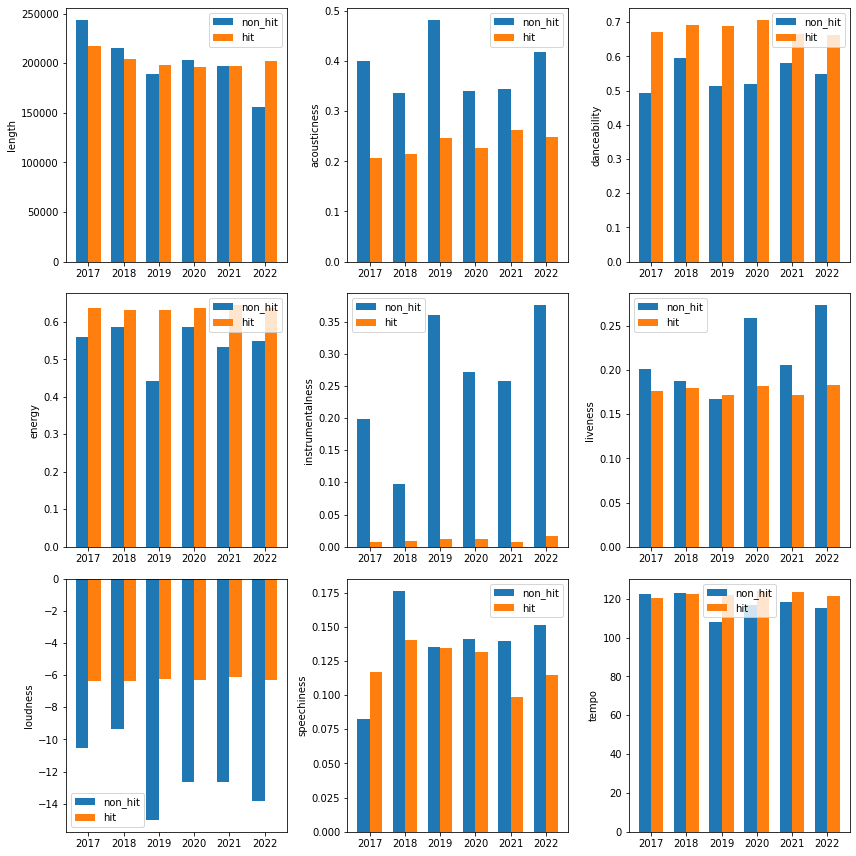

In [ ]:
fig,axs = plt.subplots(3,3,figsize = (12,12))
feature_name = ["length",	"acousticness",	"danceability",	"energy",	"instrumentalness",	"liveness",	"loudness",	"speechiness",	"tempo"]
for i in range(3):
  for j in range(3):
    feature_mean = data_df.groupby(["Is hit","year"]).agg({feature_name[i*3+j]:'mean'})
    feature_mean = feature_mean.add_suffix('_mean').reset_index()
    # print(acousticness_mean)
    # feature_mean.loc[11] = [1, int(2022),feature_mean.iloc[10,2]] 
    x = feature_mean.iloc[0:6,1]
    width = 0.35 
    y1 = feature_mean.iloc[0:6,2]
    y2 = feature_mean.iloc[6:,2]
    axs[i,j].bar(x,y1,width,label='non_hit')
    axs[i,j].bar(x+width,y2,width,label='hit')
    axs[i,j].set_xticks(x + width / 2)
    axs[i,j].set_xticklabels(['2017', '2018', '2019', '2020', '2021','2022'])
    axs[i,j].legend()
    axs[i,j].set_ylabel(feature_name[i*3+j])
    # axs[i,j].set_title(f'{feature_name[i*3+j]} over time')
fig.tight_layout()
plt.savefig("feature over time",dpi = 600)

From these figures, we observed that `danceability`, `energy`, `loudness` of hit songs have **higher** values than those of non-hit songs across six years. `acousticness`, `instrumentalness`, `liveness` scores of hit songs are **lower** than those of non-hit songs. Among all six years, `energy`, `instrumentalness`, `loudness`, `tempo` of hit songs didn't change too much, while these features of non-hit songs have had relatively large fluctuation.

Regardless of time, just look at the distribution of hit and non-hit songs, we plotted nine violin plots to figure out if there are differences between hit and non-hit songs.

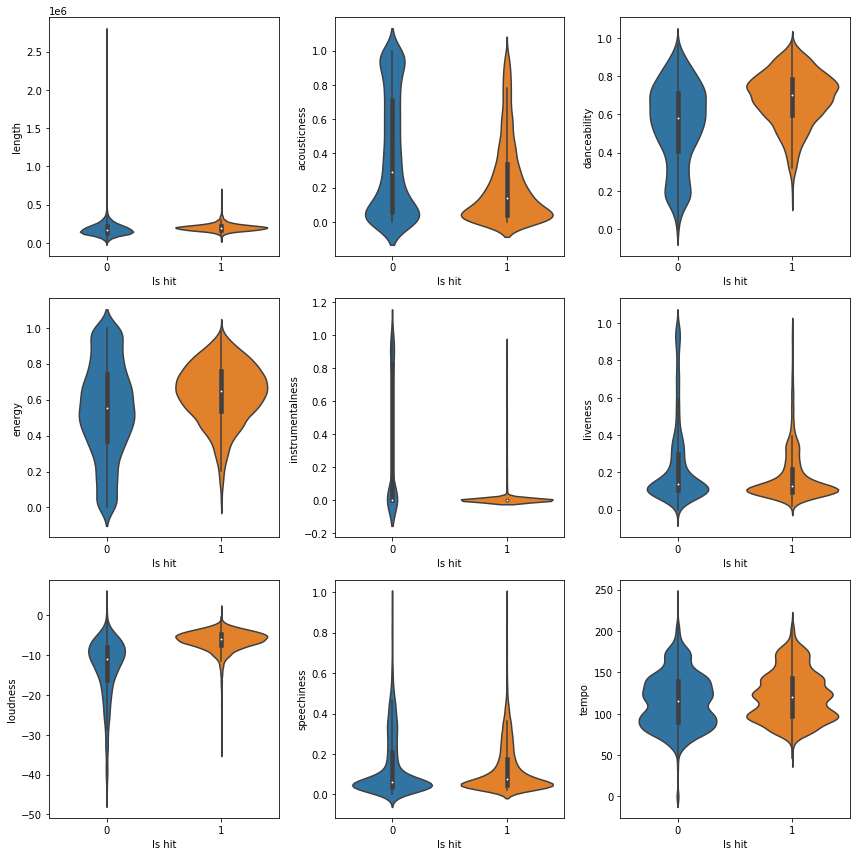

In [ ]:
import seaborn as sns
fig,axs = plt.subplots(3,3,figsize = (12,12))
feature_name = ["length",	"acousticness",	"danceability",	"energy",	"instrumentalness",	"liveness",	"loudness",	"speechiness",	"tempo"]
for i in range(3):
  for j in range(3):
    sns.violinplot(x="Is hit", y=feature_name[i*3+j], data=data_df ,ax = axs[i,j])
fig.tight_layout()
plt.savefig("feature distribution",dpi = 600)

From figures above, we can tell that except for `liveness`, `speechiness`, `tempo` these three features, the distribution of hit and non-hit songs is quite different in other features.

Next, we want to explore how lyrics might affect a song's ability to go on Spotify Top 200. Specifically, we looked at the following aspects:

*   Most frequent words present in hit and nonhit songs over six years
*   The average number of unique words in lyrics for hits and nonhits
*   Sentiment difference between hits and nonhits

Upon inspection, we found lyrics contain common words about songs' structure and singers' parts, such as "[Intro: Sean Paul]", "[Verse 1]". These words offer little meaning when making inference from lyrics. Hence, we defined a function called cleanLyrics to remove these words.

In [ ]:
def cleanLyrics(text):
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
    text = ''.join([i for i in text if not i.isdigit()])
    stripped = text.strip()
    return stripped

In [ ]:
data_df = data_df.copy()
data_df.loc[:, 'lyrics'] = data_df['lyrics'].apply(lambda x: cleanLyrics(x))

In [ ]:
data_df['lyrics'][2]

'Rockabye Lyrics\nCall it love and devotion\nCall it a mom\'s adoration, foundation\nA special bond of creation, hah\nFor all the single moms out there\nGoing through frustration\nClean Bandit, Sean-da-Paul, Anne-Marie\nSing, make them hear\n\n\nShe works at nights, by the water\nShe\'s gone astray, so far away\nFrom her father\'s daughter\nShe just wants a life for her baby\nAll on her own, no one will come\nShe\'s got to save him \n\nShe tells him, "Oh, love, no one\'s ever gonna hurt you, love."\n"I\'m gonna give you all of my love."\n"Nobody matters like you."\n\nShe tells him, "Your life ain\'t gon\' be nothing like my life." \n"You\'re gonna grow and have a good life."\n"I\'m gonna do what I\'ve got to do."\n\n\n\nSo, rockabye, baby, rockabye\nI\'m gonna rock you\nRockabye, baby, don\'t you cry\nSomebody\'s got you\nRockabye, baby, rockabye\nI\'m gonna rock you\nRockabye, baby, don\'t you cry\nAh, rockabye, no\n\n\nRockabye, rocka-rocka-rocka-bye\n\nRockabye, rocka-rocka-rocka-by

Now lyrics looks clean!

Another problem we observed is that for nonhit songs, since they are from the least popular batch, we could get wrong lyrics matches when calling API. Therefore, we need to remove songs where name and lyrics do not match to get a trimmed Dataframe.

In [ ]:
drop = []
nonhit_idx = data_df[data_df['Is hit'] == 0].index

for i in nonhit_idx:
  name = data_df.loc[i,:]['name']
  lyrics = data_df.loc[i,:]['lyrics']

  if not lyrics.startswith(name):
     drop.append(i)

To count words frequency, we first defined a function to split the text of lyrics to single words, remove stopwords and lemmatize each word to normal forms (i.e. "better" to "good"). We imported Natural Language Toolkit (NLTK) package to acheive this goal [5].

In [ ]:
!pip install -q wordcloud
import wordcloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def lyrics_to_words(document):
    stop_words = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = nltk.WordNetLemmatizer()
    # We removed non alphabetic chars as well 
    stopwordremoval = " ".join([i for i in str(document).lower().split() if i not in stop_words and i.isalpha()])
    punctuationremoval = ''.join(ch for ch in stopwordremoval if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized

In [ ]:
words = []
for word in data_df['lyrics'].tolist():
    words.append(np.unique(lyrics_to_words(word).split()))

In [ ]:
# Lemmatized unique words for the song Rockabye
words[2]

array(['angel', 'away', 'baby', 'beyond', 'bond', 'bother', 'bus', 'call',
       'care', 'clean', 'cold', 'come', 'compare', 'cry', 'daughter',
       'dear', 'devotion', 'di', 'disappear', 'dry', 'ever', 'eye',
       'eyeembed', 'facing', 'far', 'fare', 'fear', 'fee', 'find',
       'foundation', 'frustration', 'give', 'going', 'gone', 'gonna',
       'good', 'got', 'grow', 'hah', 'hard', 'hear', 'heavily', 'hurt',
       'inna', 'keep', 'know', 'life', 'lift', 'like', 'look', 'love',
       'lyric', 'make', 'matter', 'mom', 'never', 'nothing', 'nowhere',
       'obstacle', 'one', 'pop', 'prepared', 'really', 'rock', 'rockabye',
       'rum', 'safe', 'save', 'say', 'school', 'shed', 'single', 'sky',
       'special', 'steadily', 'surround', 'tear', 'tell', 'thing', 'time',
       'trying', 'want', 'warm', 'water', 'well', 'without', 'work', 'ya',
       'yeah', 'year', 'yo', 'yout'], dtype='<U11')

In [ ]:
# Append splitted words to new column
data_df['words'] = words

In [ ]:
# Get rid of songs with inaccurate lyrics search
trimmed_df = data_df.copy()
trimmed_df.drop(drop,inplace=True)
len(trimmed_df)

6058

We then rejoined words in each song to form our corpus (a tokenized list) to be ready to pass into CountVectorizer.

In [ ]:
words_df = trimmed_df[['words','year', 'Is hit']]
tokenized_list = [' '.join(inner_list) for inner_list in words_df['words'].values]
tokenized_list

In [ ]:
# Check length of list
len(tokenized_list)

6058

Now we passed our tokenized list to CountVectorizer. Here we defined extra stopwords specific to lyrics semantics (e.g. "ah", "yo"). Then we converted CountVectorizer to Dataframe and added year (when the hit song made to Top 200 Chart and when the album was released for nonhit songs) as well as class label.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Defined own Stopwords in case the clean lyrics function does not remove all of them
stop_words = ["ah","oh","yo","yeah", "aint", "lyric", 'im', "i'm", 'ive', 'i…', "ya", 'uh', 'wanna', 
              "want", 'u','n','got', 'gotta', 'huh','ooh','i', 'like','know','get','cause','go','one',
              'me','make','let','say','cant','could','would','take','way','back', 'you', "really", "there", 
              "would", 'aa', 'aaa', 'aaaa', 'aaaaahh', 'aaaaahhhhhh', 'aaaah', 'aaaahh', 'aaaahaaahaaaa',
              'aaahaah','aa','aaaaah','aaah','aaaha','aaahhhhhh'] + stopwords.words('english')

# Count the frequency of each word that isn't on the stop_words lists          
cv = CountVectorizer(stop_words=stop_words, dtype=np.int32)

# Create a dataframe called data_cv to store the the number of times the word was used in a lyric based on their years
text_cv = cv.fit_transform(tokenized_list)
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names_out())
data_cv['year'] = words_df['year'].values
data_cv['Is hit'] = words_df['Is hit'].values

In [ ]:
data_cv

,aah,aaha,aaja,aajaembed,aaliya,aaliyaembed,aaliyah,aames,aan,aana,...,𝘵𝘳𝘰𝘥,𝘵𝘳𝘶𝘵𝘩,𝘶𝘱,𝘷𝘦𝘳𝘺,𝘸𝘢𝘯𝘯𝘢,𝘸𝘳𝘪𝘵𝘦,𝘺𝘢,𝘺𝘰𝘶,𝘺𝘰𝘶𝘳,Is hit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For the sake of space, we just displayed top 10 frequent words for hits/nonhits in 2017 and 2022. The result for all six years is rather similar: **there is no abrupt change of frequent lyrics words from 2017 to 2022**. Moreover, there are some all-time popular words such as "time", "feel", "love". They appear equally frequent in both hits and nonhits, as shown by `count/num songs` column.

In [ ]:
# Created a dataframe that sums the ocurrence frequency of each word and group the result by year
vect_words_2017 = data_cv.loc[data_cv['year'] == 2017].groupby('Is hit').sum().T
vect_words_2017 = vect_words_2017.reset_index(level=0).rename(columns ={'index':'words'})
vect_words_2017 = vect_words_2017.rename_axis(columns='')
vect_words_2017.drop(vect_words_2017.index[vect_words_2017['words'] == 'year'], inplace=True)

In [ ]:
vect_words_2017

,words,0,1
0,aah,0,0
1,aaha,0,0
2,aaja,0,0
3,aajaembed,0,0
4,aaliya,0,0
...,...,...,...
46281,𝘸𝘢𝘯𝘯𝘢,0,0
46282,𝘸𝘳𝘪𝘵𝘦,0,0
46283,𝘺𝘢,0,0
46284,𝘺𝘰𝘶,0,0


In [ ]:
freq_words_idx = vect_words_2017[0].sort_values(ascending=False)[1:11].index
vect_df_2017_nonhit = vect_words_2017[['words',0]].iloc[freq_words_idx]
songs_2017 = len(trimmed_df[(trimmed_df['Is hit'] == 0) & (trimmed_df['year'] == 2017)])
vect_df_2017_nonhit["count/num songs"] = vect_df_2017_nonhit[0].apply(lambda x: x / songs_2017)

Top 10 words in nonhit songs in 2017:

In [ ]:
vect_df_2017_nonhit

,words,0,count/num songs
31473,right,14,0.358974
37015,tell,13,0.333333
20235,keep,13,0.333333
17903,home,13,0.333333
25338,never,13,0.333333
37565,time,13,0.333333
13939,feel,12,0.307692
1066,alone,12,0.307692
22097,love,12,0.307692
1125,always,11,0.282051


In [ ]:
freq_words_idx = vect_words_2017[1].sort_values(ascending=False)[1:11].index
vect_df_2017_hit = vect_words_2017[['words',1]].iloc[freq_words_idx]
songs_2017 = len(trimmed_df[(trimmed_df['Is hit'] == 1) & (trimmed_df['year'] == 2017)])
vect_df_2017_hit["count/num songs"] = vect_df_2017_hit[1].apply(lambda x: x / songs_2017)

Top 10 words in hit songs in 2017:

In [ ]:
vect_df_2017_hit

,words,1,count/num songs
37565,time,368,0.380558
25338,never,363,0.375388
33128,see,358,0.370217
7373,come,353,0.365047
25182,need,326,0.337125
13939,feel,304,0.314374
31473,right,298,0.308170
37015,tell,288,0.297828
20235,keep,273,0.282316
29677,put,245,0.253361


In [ ]:
vect_words_2022 = data_cv.loc[data_cv['year'] == 2022].groupby('Is hit').sum().T
vect_words_2022 = vect_words_2022.reset_index(level=0).rename(columns ={'index':'words'})
vect_words_2022 = vect_words_2022.rename_axis(columns='')
vect_words_2022.drop(vect_words_2022.index[vect_words_2022['words'] == 'year'], inplace=True)

In [ ]:
vect_words_2022

,words,0,1
0,aah,0,0
1,aaha,0,0
2,aaja,0,1
3,aajaembed,0,1
4,aaliya,0,0
...,...,...,...
46281,𝘸𝘢𝘯𝘯𝘢,0,1
46282,𝘸𝘳𝘪𝘵𝘦,0,1
46283,𝘺𝘢,0,1
46284,𝘺𝘰𝘶,0,1


In [ ]:
freq_words_idx = vect_words_2022[0].sort_values(ascending=False)[1:11].index
vect_df_2022_nonhit = vect_words_2022[['words',0]].iloc[freq_words_idx]
songs_2022 = len(trimmed_df[(trimmed_df['Is hit'] == 0) & (trimmed_df['year'] == 2022)])
vect_df_2022_nonhit["count/num songs"] = vect_df_2022_nonhit[0].apply(lambda x: x / songs_2022)

Top 10 words in nonhit songs in 2022:

In [ ]:
vect_df_2022_nonhit

,words,0,count/num songs
33128,see,119,0.416084
7373,come,114,0.398601
22097,love,110,0.384615
25182,need,95,0.332168
25338,never,95,0.332168
37015,tell,93,0.325175
13939,feel,91,0.318182
33732,shit,88,0.307692
20235,keep,87,0.304196
37352,think,86,0.300699


In [ ]:
freq_words_idx = vect_words_2022[1].sort_values(ascending=False)[1:11].index
vect_df_2022_hit = vect_words_2022[['words',1]].iloc[freq_words_idx]
songs_2022 = len(trimmed_df[(trimmed_df['Is hit'] == 1) & (trimmed_df['year'] == 2022)])
vect_df_2022_hit["count/num songs"] = vect_df_2022_hit[1].apply(lambda x: x / songs_2022)

Top 10 words in hit songs in 2022:

In [ ]:
vect_df_2022_hit

,words,1,count/num songs
25338,never,274,0.300439
37565,time,274,0.300439
33128,see,269,0.294956
13939,feel,243,0.266447
7373,come,229,0.251096
25182,need,228,0.250000
37015,tell,220,0.241228
9345,de,219,0.240132
29826,que,218,0.239035
20235,keep,214,0.234649


We visually displayed top words in 2017 and 2022 using WordCloud. As we can tell from the graph, word frequency does sway but does not differ too much.

In [ ]:
def plot_wordcloud(df,row,col):
    wc = wordcloud.WordCloud(background_color="white",colormap="Dark2",max_font_size=100,random_state=15)

    fig = plt.figure(figsize=(20,10))
    
    for index, value in enumerate(df.columns[1:]):

        top_dict = dict(zip(df['words'].tolist(),df[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}",fontsize=15) 

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

Top words in 2017:

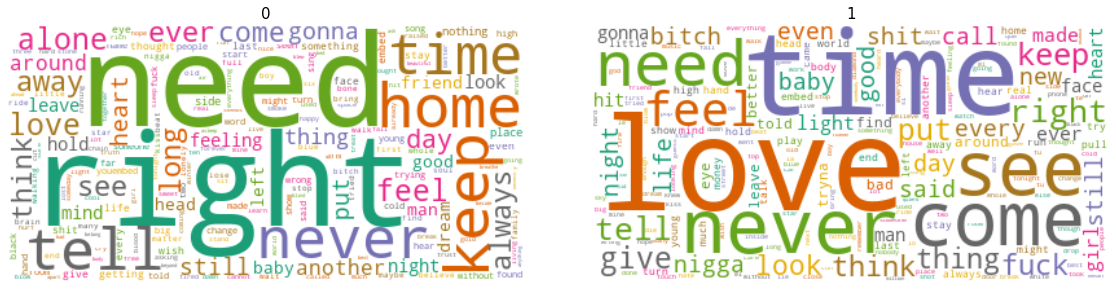

In [ ]:
plot_wordcloud(vect_words_2017,2,2)

Top words in 2022:

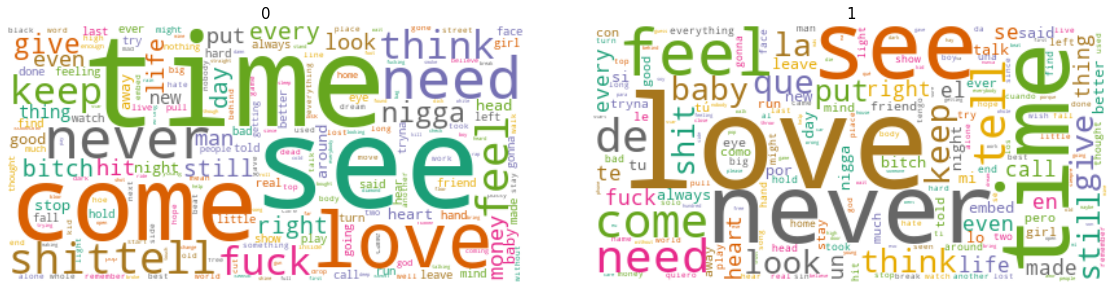

In [ ]:
plot_wordcloud(vect_words_2022,2,2)

Now let's move on to the next hypothesis: will number of unique words affect a song's popularity? We implemented our function to obtain some basic stats of songs: **total words of songs**, **total number of songs**, **unique words of songs**, **unique words per song**.

In [ ]:
def words_stats(df,main_df):
    unique_words = 0
    total_words = 0
    total_songs = len(main_df[main_df["words"].str.len() != 0])
    unique_words = np.sum(df.fillna(0).astype(bool).sum(axis=1))
 
    for j in range(len(main_df)):
      total_words += len(main_df['lyrics'].iloc[j].split())
    
    unique_words_per_song = round(unique_words / total_songs,0)
    return unique_words, total_words, total_songs, unique_words_per_song

In [ ]:
data_cv_nonhit = data_cv[data_cv["Is hit"] == 0]
nonhit = trimmed_df[trimmed_df['Is hit'] == 0]

In [ ]:
# Number of nonhits in trimmed_df
len(data_cv_nonhit)

904

In [ ]:
# Get stats of nonhits
nonhit_stats = words_stats(data_cv_nonhit,nonhit)

In [ ]:
data_cv_hit = data_cv[data_cv["Is hit"] == 1]
hit = data_df[data_df['Is hit'] == 1]
# Get stats of hits
hit_stats = words_stats(data_cv_hit,hit)

In [ ]:
# Create Dataframe for display
unique_words = []
total_words = []
total_songs = []
unique_words_per_song = []

unique_words.extend([nonhit_stats[0], hit_stats[0]])
total_words.extend([nonhit_stats[1], hit_stats[1]])
total_songs.extend([nonhit_stats[2], hit_stats[2]])
unique_words_per_song.extend([nonhit_stats[3], hit_stats[3]])

In [ ]:
stats_df = pd.DataFrame({'popularity':['non hits', 'hits'],'unique words':unique_words,
                         'total words':total_words,'total songs':total_songs, 
                         'unique words per song':unique_words_per_song})

As seen from the table below, hit songs generally have **more** unique words than nonhit songs. Notice the number of nonhit songs is smaller since we removed those nonhits where we were unable to match lyrics. Therefore, before we add this feature to our dataset, we set number of unique words for songs with missing lyrics to be the average number of unique words across all nonhit songs.

In [ ]:
stats_df

,popularity,unique words,total words,total songs,unique words per song
0,non hits,67533,330403,904,75.0
1,hits,431523,2247179,5154,84.0


In [ ]:
# Add number of unique words column
data_df['num of unique words'] = data_df['words'].apply(lambda x: len(x))

In [ ]:
# Avg num of words in nonhit songs
67533 / 904

74.70464601769912

In [ ]:
nonhit_idx = list(data_df[data_df['Is hit'] == 0].index)
found_idx = list(nonhit.index)

# Get index of nonhit songs with inaccurate lyrics match
unfound_idx = np.setdiff1d(nonhit_idx, found_idx)
len(unfound_idx)

2829

In [ ]:
# Set num of words of nonhit songs whose lyrics cannot be found to avg
data_df.at[unfound_idx,'num of unique words'] = 75

In [ ]:
data_df

,name,trackID,popularity,album,artist,artist_popularity,release_date,length,acousticness,danceability,...,Is hit,lyrics,Pop,Rock,Country,R&B,Hiphop,Is weekend,words,num of unique words
0,Starboy,5aAx2yezTd8zXrkmtKl66Z,0,Starboy,The Weeknd,97,2016-11-25,230453,0.16500,0.681,...,1,Starboy Lyrics\nAyy\n\n\nI'm tryna put you in ...,1,0,0,0,0,0,"[ah, aid, alive, ayy, bandit, bitch, blue, bou...",101
1,Closer,7BKLCZ1jbUBVqRi2FVlTVw,83,Closer,The Chainsmokers,86,2016-07-29,244960,0.41400,0.748,...,1,"Closer Lyrics\nHey, I was doing just fine befo...",1,0,0,0,0,0,"[afford, back, backseat, bar, beat, bite, boul...",56
2,Rockabye (feat. Sean Paul & Anne-Marie),5knuzwU65gJK7IF5yJsuaW,74,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,81,2016-10-21,251088,0.40600,0.720,...,1,Rockabye Lyrics\nCall it love and devotion\nCa...,1,0,0,0,0,0,"[angel, away, baby, beyond, bond, bother, bus,...",92
3,Let Me Love You,4pdPtRcBmOSQDlJ3Fk945m,0,Encore,DJ Snake,82,2016-08-05,205946,0.07840,0.476,...,1,Let Me Love You Lyrics\nI used to believe\nWe ...,1,0,0,0,0,0,"[ahead, asleep, awakening, away, beautiful, be...",41
4,I Don’t Wanna Live Forever (Fifty Shades Darke...,3NdDpSvN911VPGivFlV5d0,0,I Don’t Wanna Live Forever (Fifty Shades Darker),ZAYN,81,2016-12-09,245200,0.06310,0.735,...,1,I Don’t Wanna Live Forever Lyrics\nBeen sittin...,1,0,0,0,0,0,"[around, back, behind, bullet, call, calling, ...",58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8882,Dummy Boy,6mTs4GFiyOAYElOoMRRSv1,1,Days Of Our Lives,Owe Cee,7,2020-12-18,161123,0.04790,0.736,...,0,"Dummy Boy Lyrics\nAyy, Fauni Figueroa, let's g...",0,0,0,0,0,0,"[air, always, back, bag, bah, band, believed, ...",94
8883,This Week,0TS25ET0m3LbHwiqSuIpLd,1,Days Of Our Lives,Owe Cee,7,2020-12-18,212297,0.04350,0.898,...,0,"This Week Lyrics\nCook that shit up, Quay\n\n\...",0,0,0,0,0,0,"[account, add, another, bag, bando, bank, beca...",127
8884,Posted,6W6sKsiectRZ2y6MatvuUc,1,Days Of Our Lives,Owe Cee,7,2020-12-18,208091,0.04230,0.770,...,0,"Posted Lyrics\nLaid low, in the cut, lamped up...",0,0,0,0,0,0,"[act, as, asked, average, back, beep, bend, be...",131
8885,Chances,3WWRb9PBCeDA9ROPrAFVt5,1,Days Of Our Lives,Owe Cee,7,2020-12-18,190040,0.20200,0.917,...,0,"Rap God Lyrics\n""Look, I was gonna go easy on ...",0,0,0,0,0,0,"[able, accolade, acrobat, actually, add, after...",75


Finally, we were set to analyze lyrics sentiment for hits and nonhits. In this project, we used **VADER Model** (Valence Aware Dictionary for Sentiment Reasoning), which is a package in NLTK for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text [6].


We focused primarily on compound score, which is a **normalized, weighted, composite score** on text sentiment.It is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive) [7]. 

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
data_df['scores'] = data_df['lyrics'].apply(lambda x: sid.polarity_scores(x))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Mapping compound score to sentiment column
data_df['sentiment'] = data_df['scores'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
data_df['positive score'] = data_df['scores'].apply(lambda score_dict: score_dict['pos'])
data_df['neutral score'] = data_df['scores'].apply(lambda score_dict: score_dict['neu'])
data_df['negative score'] = data_df['scores'].apply(lambda score_dict: score_dict['neg'])
data_df.drop('scores',axis=1, inplace=True)

In [ ]:
# Remove unnamed index columns in Dataframe
data_df = data_df.loc[:, ~data_df.columns.str.contains('^Unnamed')]

Once again, for nonhit songs with inaccurate lyrics matches, we set sentiment, positive, neutral, and negative scores to be the respective average score for nonhit class.

In [ ]:
# Get mean scores
mean_sentiment_nonhit = np.mean(data_df['sentiment'].iloc[found_idx])
mean_positive_nonhit = np.mean(data_df['positive score'].iloc[found_idx])
mean_neutral_nonhit = np.mean(data_df['neutral score'].iloc[found_idx])
mean_negative_nonhit = np.mean(data_df['negative score'].iloc[found_idx])

In [ ]:
# Set sentiment scores of songs with inaccurate lyrics match to mean value
data_df['sentiment'].iloc[unfound_idx] = mean_sentiment_nonhit
data_df['positive score'].iloc[unfound_idx] = mean_positive_nonhit
data_df['neutral score'].iloc[unfound_idx] = mean_neutral_nonhit
data_df['negative score'].iloc[unfound_idx] = mean_negative_nonhit

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


We then computed mean sentiment scores for hits and nonhits. As data shown below, we did see a discrepancy between the two classes: hit songs have **more positive** tone than nonhit songs. Our hypothesis is justified and we added sentiment score as a new feature to our dataset.

In [ ]:
# Mean sentiment score for nonhits
np.mean(data_df[data_df['Is hit'] == 0]['sentiment'])

0.029435287610621527

In [ ]:
# Mean sentiment score for hits
np.mean(data_df[data_df['Is hit'] == 1]['sentiment'])

0.041155801319363736

In [ ]:
data_df

,name,trackID,popularity,album,artist,artist_popularity,release_date,length,acousticness,danceability,...,Country,R&B,Hiphop,Is weekend,words,num of unique words,sentiment,positive score,neutral score,negative score
0,Starboy,5aAx2yezTd8zXrkmtKl66Z,0,Starboy,The Weeknd,97,2016-11-25,230453,0.16500,0.681,...,0,0,0,0,"[ah, aid, alive, ayy, bandit, bitch, blue, bou...",101,-0.988300,0.071000,0.777000,0.152000
1,Closer,7BKLCZ1jbUBVqRi2FVlTVw,83,Closer,The Chainsmokers,86,2016-07-29,244960,0.41400,0.748,...,0,0,0,0,"[afford, back, backseat, bar, beat, bite, boul...",56,0.980800,0.134000,0.818000,0.048000
2,Rockabye (feat. Sean Paul & Anne-Marie),5knuzwU65gJK7IF5yJsuaW,74,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,81,2016-10-21,251088,0.40600,0.720,...,0,0,0,0,"[angel, away, baby, beyond, bond, bother, bus,...",92,0.997500,0.204000,0.730000,0.066000
3,Let Me Love You,4pdPtRcBmOSQDlJ3Fk945m,0,Encore,DJ Snake,82,2016-08-05,205946,0.07840,0.476,...,0,0,0,0,"[ahead, asleep, awakening, away, beautiful, be...",41,0.966100,0.196000,0.623000,0.181000
4,I Don’t Wanna Live Forever (Fifty Shades Darke...,3NdDpSvN911VPGivFlV5d0,0,I Don’t Wanna Live Forever (Fifty Shades Darker),ZAYN,81,2016-12-09,245200,0.06310,0.735,...,0,0,0,0,"[around, back, behind, bullet, call, calling, ...",58,-0.972400,0.051000,0.832000,0.117000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8882,Dummy Boy,6mTs4GFiyOAYElOoMRRSv1,1,Days Of Our Lives,Owe Cee,7,2020-12-18,161123,0.04790,0.736,...,0,0,0,0,"[air, always, back, bag, bah, band, believed, ...",94,-0.928900,0.136000,0.702000,0.162000
8883,This Week,0TS25ET0m3LbHwiqSuIpLd,1,Days Of Our Lives,Owe Cee,7,2020-12-18,212297,0.04350,0.898,...,0,0,0,0,"[account, add, another, bag, bando, bank, beca...",127,0.923700,0.162000,0.717000,0.121000
8884,Posted,6W6sKsiectRZ2y6MatvuUc,1,Days Of Our Lives,Owe Cee,7,2020-12-18,208091,0.04230,0.770,...,0,0,0,0,"[act, as, asked, average, back, beep, bend, be...",131,0.370100,0.098000,0.777000,0.124000
8885,Chances,3WWRb9PBCeDA9ROPrAFVt5,1,Days Of Our Lives,Owe Cee,7,2020-12-18,190040,0.20200,0.917,...,0,0,0,0,"[able, accolade, acrobat, actually, add, after...",75,0.029435,0.124007,0.764259,0.111769


<a name='section_8'></a>
# Model Building

After EDA of audio features and lyrics, we believe that some of the features of hit and non-hit songs are different, thus distinguishing hit songs from non-hit songs.
Therefore, we decide to build 5 models as following:


*   Baseline model (audio features)
*   Baseline model + genres
*   Baseline model + release date
*   Baseline model + lyrics sentiment
*   Baseline model + number of words









After loading final dataset obtained from EDA, we utilized `XGBoost`, `Logistic Regression`, `Random Forest`, `K Nearest Neighbors`, `Decision Tree` to fit our data. Since there is ~1000 difference between number of hits and nonhits, we used `SMOTE` to balance our data.

In [ ]:
X = data_df

In [ ]:
from sklearn.model_selection import train_test_split
data = X[['length', 'acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo']]
y = X["Is hit"]
from collections import Counter
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=88)
X_smo, y_smo = smo.fit_resample(data, y)
X_train, X_test, Y_train, Y_test = train_test_split(X_smo, y_smo, test_size=0.3,random_state=88)

First we employed logistic regression to classify result and used `Precision`, `Recall`, `Accuracy`, `F1 score`, `ROC_AUC score`, these five metrics to evaluate model performance.

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,roc_auc_score

clf = LogisticRegression(random_state=42).fit(X_train, Y_train)
pred = clf.predict(X_test)
print("Precision = {}".format(precision_score(Y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(Y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, pred)))
print("F1 score = {}".format(f1_score(Y_test, pred)))
print("ROC_AUC score = {}".format(roc_auc_score(Y_test, pred)))

Precision = 0.7848502012398536
Recall = 0.7822243948621619
Accuracy = 0.7827352085354026
F1 score = 0.7938650306748466
ROC_AUC score = 0.7822243948621618


Then we used KNN (neighbor number equals to 3) and Decision Tree to fit data.

In [ ]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
pred = neigh.predict(X_test)
print("Precision = {}".format(precision_score(Y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(Y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, pred)))
print("F1 score = {}".format(f1_score(Y_test, pred)))
print("ROC_AUC score = {}".format(roc_auc_score(Y_test, pred)))

Precision = 0.6838459174427933
Recall = 0.6836152793645112
Accuracy = 0.6838021338506305
F1 score = 0.6912878787878787
ROC_AUC score = 0.6836152793645112


In [ ]:
# Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print("Precision = {}".format(precision_score(Y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(Y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, pred)))
print("F1 score = {}".format(f1_score(Y_test, pred)))
print("ROC_AUC score = {}".format(roc_auc_score(Y_test, pred)))

Precision = 0.7987296277040621
Recall = 0.798423572232658
Accuracy = 0.7985774329130294
F1 score = 0.8030350932658868
ROC_AUC score = 0.798423572232658


XGBoost is a parallel tree boosting tool that solves a variety of data science issues quickly and accurately.

In [ ]:
# XGBoost
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)
param = {
    'eta': 0.5, 
    'max_depth': 5,  
    'objective': 'multi:softprob',  
    'num_class': 2} 

steps = 10  # The number of training iterations
model = xgb.train(param, D_train, steps)
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))
print("F1 score = {}".format(f1_score(Y_test, best_preds)))
print("ROC_AUC score = {}".format(roc_auc_score(Y_test, best_preds)))

Precision = 0.8469930461429666
Recall = 0.8447155086904669
Accuracy = 0.8451341739411574
F1 score = 0.8520234785295026
ROC_AUC score = 0.8447155086904667


Random forests adopt the method of minimizing variation by averaging numerous deep decision trees trained on various regions of the same training set.

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print("Precision = {}".format(precision_score(Y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(Y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, pred)))
print("F1 score = {}".format(f1_score(Y_test, pred)))
print("ROC_AUC score = {}".format(roc_auc_score(Y_test, pred)))

Precision = 0.8661020561600892
Recall = 0.8648950637211691
Accuracy = 0.8651794374393792
F1 score = 0.8697282099343955
ROC_AUC score = 0.8648950637211691


From all of these metrics value, we can tell that `random forest` **performs the best** because it has the highest precision, recall, accuracy, f1 score, and ROC_AUC score.

Now, we want to analyze if genres are related to the popularity of song. We use baseline model and genres features to build model.

In [ ]:
# base model plue genres
data = X[['length', 'acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','Pop','Rock','Country','R&B','Hiphop']]
y = X["Is hit"]
smo = SMOTE(random_state=88)
X_smo, y_smo = smo.fit_resample(data, y)
X_train, X_test, Y_train, Y_test = train_test_split(X_smo, y_smo, test_size=0.3,random_state=88)
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print("Precision = {}".format(precision_score(Y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(Y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, pred)))
print("F1 score = {}".format(f1_score(Y_test, pred)))
print("ROC_AUC score = {}".format(roc_auc_score(Y_test, pred)))

Precision = 0.9056819873449269
Recall = 0.9056982732809336
Accuracy = 0.9055932751374071
F1 score = 0.9056847545219638
ROC_AUC score = 0.9056982732809336


Compare to the baseline model, we found that the accuracy of model changed from 0.865 to 0.906 which proved **genres do have strong relationship with song popularity**.

Next, we explored if a song released on weekend would make it more likely to become hit. We used baseline model and release date feature to build model.

In [ ]:
# base model plus release date
data = X[['length', 'acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','Is weekend']]
y = X["Is hit"]
smo = SMOTE(random_state=88)
X_smo, y_smo = smo.fit_resample(data, y)
X_train, X_test, Y_train, Y_test = train_test_split(X_smo, y_smo, test_size=0.3,random_state=88)
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print("Precision = {}".format(precision_score(Y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(Y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, pred)))
print("F1 score = {}".format(f1_score(Y_test, pred)))
print("ROC_AUC score = {}".format(roc_auc_score(Y_test, pred)))

Precision = 0.8677392583650836
Recall = 0.8668864025264327
Accuracy = 0.8671193016488846
F1 score = 0.8710385942893004
ROC_AUC score = 0.8668864025264327


From the output, we figured out that the accuracy is almost the same as that of baseline model. Therefore, we believe that **whether a song was released on weekend will not be a determining factor of song popularity**.

Then, we added lyrics sentiment into our baseline model.

In [ ]:
# base model plus sentiment
data = X[['length', 'acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','sentiment']]
y = X["Is hit"]
smo = SMOTE(random_state=88)
X_smo, y_smo = smo.fit_resample(data, y)
X_train, X_test, Y_train, Y_test = train_test_split(X_smo, y_smo, test_size=0.3,random_state=88)
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print("Precision = {}".format(precision_score(Y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(Y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, pred)))
print("F1 score = {}".format(f1_score(Y_test, pred)))
print("ROC_AUC score = {}".format(roc_auc_score(Y_test, pred)))

Precision = 0.9278947588747488
Recall = 0.927437403715716
Accuracy = 0.9275784028451342
F1 score = 0.9292035398230089
ROC_AUC score = 0.927437403715716


From the result, we saw the accuracy changed from 0.865 to 0.928 which is a huge improvement! Therefore, we believe **lyrics sentiment will affect whether a song becomes hit or not**.

In the EDA part, we found the number of unique words in a hit song is different from that of non-hit songs. Therefore, last feature we explored is number of unique words.

In [ ]:
# base model plus num of unique words
data = X[['length', 'acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','num of unique words']]
y = X["Is hit"]
smo = SMOTE(random_state=88)
X_smo, y_smo = smo.fit_resample(data, y)
X_train, X_test, Y_train, Y_test = train_test_split(X_smo, y_smo, test_size=0.3,random_state=88)
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print("Precision = {}".format(precision_score(Y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(Y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, pred)))
print("F1 score = {}".format(f1_score(Y_test, pred)))
print("ROC_AUC score = {}".format(roc_auc_score(Y_test, pred)))

Precision = 0.921672784192926
Recall = 0.9213120087515201
Accuracy = 0.9214354995150339
F1 score = 0.923076923076923
ROC_AUC score = 0.9213120087515201


The result also changed from 0.865 to 0.921 which infers **number of unique words is a strong predictor to a song's popularity**.

After exploring these four features, we finalized our model with audio features, genres, number of unique words, and lyrics sentiment.

In [ ]:
# final model
from sklearn.model_selection import train_test_split
data = X[['length', 'acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','num of unique words','sentiment','Pop','Rock','Country','R&B','Hiphop']]
y = X["Is hit"]
smo = SMOTE(random_state=88)
X_smo, y_smo = smo.fit_resample(data, y)
X_train, X_test, Y_train, Y_test = train_test_split(X_smo, y_smo, test_size=0.3,random_state=88)
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print("Precision = {}".format(precision_score(Y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(Y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, pred)))
print("F1 score = {}".format(f1_score(Y_test, pred)))
print("ROC_AUC score = {}".format(roc_auc_score(Y_test, pred)))

Precision = 0.9447914043552137
Recall = 0.9446519046097694
Accuracy = 0.944713870029098
F1 score = 0.9455933821189946
ROC_AUC score = 0.9446519046097694


This is our best model with **0.945 precision, 0.945 recall, and 0.945 accuracy**.

<a name='section_9'></a>
# Conclusion

Learning from model performance, we justified all of our initial hypothesis except song release date. For songs that have a chance to rise to 2017-2022 weekly Spotify Top 200 Chart, song acoustic features, lyrics sentiment, music genre, and number of unique words in the song will affect song popularity. As the last section suggests, a comprehensive model that takes all these factors into account offers the best prediction result. From a big picture perspective, audiences largely favored pop music that has high dancibility, high energy, and high loudness. They also prefer low acousticness and instrumentalness. As for lyrics, song with uplifted sentiment and higher count of unique words will be more likely to win audiences' favor.

<a name='section_10'></a>
# Future Direction

Given the assumptions made before modeling, there are plenty of room for improvement in future course. First of all, more representative data samples can be used for modeling. In this study, non-hit songs were extracted from the 10% least popular albums provided on the Spotify API. The list of unpopular songs can be more representative if songs from a wider range of popularity can be found. Moreover, the lyrics sentiment is normalized on a scale of -1 to 1, with 1 meaning positive attitude and -1 representing negative attitude. More specific lyrics sentiment like "bewildered", "peaceful", "anxious", etc, can be used in modeling in the future. 

Moving into future, we would also like to explore additional features such as artist popularity, number of related tweets/retweets on Twitter, number of Youtube likes, and whether it is the first song released by the singer. With more such information on a specific timestamp, we expect to build a more robust model and better predict whether a song will be listed on Spotify Top 200 Chart. 


# Reference

[1] Bibliography Dhar, Vasant, and Elaine A. Chang. 2009. “Does Chatter Matter? The Impact of User-Generated Content on Music Sales.” Journal of Interactive Marketing 23 (4): 300–307. https://doi.org/10.1016/j.intmar.2009.07.004.


[2] Interiano, Myra, Kamyar Kazemi, Lijia Wang, Jienian Yang, Zhaoxia Yu, and Natalia L. Komarova. 2018. “Musical Trends and Predictability of Success in Contemporary Songs in and out of the Top Charts.” Royal Society Open Science 5 (5): 171274. https://doi.org/10.1098/rsos.171274.



[3] Reiman, Minna, Philippa Örnell, Kth Skolan, För Elektroteknik, and Och Datavetenskap. 2018. “Predicting Hit Songs with Machine Learning.” http://www.diva-portal.org/smash/get/diva2:1214146/FULLTEXT01.pdf.

[4] Götting, Marie. "U.S. Favorite Music Genres 2018." Statista. Accessed May 9, 2022. https://www.statista.com/statistics/442354/music-genres-preferred-consumers-usa/.



[5] NLTK Document: https://www.nltk.org/

[6] Sentiment Analysis Using VADER: https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

[7] VADER Github Repo: https://github.com/cjhutto/vaderSentiment

Others: VADER Source Code: https://www.nltk.org/_modules/nltk/sentiment/vader.html  